In [1]:
import pandas as pd

# Sample Data
data = {
    "Month": ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    "Beginning_Inventory": [50000, 45000, 40000, 38000, 35000, 32000, 30000, 32000, 34000, 36000, 38000, 40000],
    "Ending_Inventory": [45000, 40000, 38000, 35000, 32000, 30000, 32000, 34000, 36000, 38000, 40000, 35000],
    "COGS": [120000, 115000, 110000, 105000, 100000, 95000, 90000, 95000, 100000, 105000, 110000, 115000],
    "Gross_Profit": [80000, 85000, 90000, 95000, 100000, 105000, 110000, 105000, 100000, 95000, 90000, 85000],
    "Revenue": [200000, 200000, 200000, 200000, 200000, 200000, 200000, 200000, 200000, 200000, 200000, 200000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate KPIs
df["Average_Inventory"] = (df["Beginning_Inventory"] + df["Ending_Inventory"]) / 2
df["DSI"] = (df["Average_Inventory"] / df["COGS"]) * 365
df["Inventory_Turnover"] = df["COGS"] / df["Average_Inventory"]
df["GMROI"] = df["Gross_Profit"] / df["Average_Inventory"]

# Save to CSV
df.to_csv("dsi_kpis_optimized.csv", index=False)
print("CSV generated: dsi_kpis_optimized.csv")

CSV generated: dsi_kpis_optimized.csv


In [2]:
import pandas as pd
from datetime import datetime
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Create sample data for 12 months
months = pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%b-%Y')
beginning_inventory = np.random.randint(40000, 60000, 12)
ending_inventory = beginning_inventory * np.random.uniform(0.85, 0.95, 12)
cogs = np.random.randint(90000, 130000, 12)
revenue = cogs * np.random.uniform(1.6, 2.0, 12)

# Create DataFrame
data = pd.DataFrame({
    'Month': months,
    'Beginning Inventory ($)': beginning_inventory,
    'Ending Inventory ($)': ending_inventory,
    'COGS ($)': cogs,
    'Revenue ($)': revenue
})

# Calculate metrics
data['Average Inventory ($)'] = (data['Beginning Inventory ($)'] + data['Ending Inventory ($)']) / 2
data['DSI (Days)'] = (data['Average Inventory ($)'] / data['COGS ($)']) * 365
data['Inventory Turnover Ratio'] = data['COGS ($)'] / data['Average Inventory ($)']
data['Gross Profit ($)'] = data['Revenue ($)'] - data['COGS ($)']
data['GMROI'] = data['Gross Profit ($)'] / data['Average Inventory ($)']

# Format numbers
for col in data.columns[1:]:
    if '$' in col:
        data[col] = data[col].map('${:,.0f}'.format)
    elif col in ['DSI (Days)', 'GMROI']:
        data[col] = data[col].map('{:.1f}'.format)
    elif col == 'Inventory Turnover Ratio':
        data[col] = data[col].map('{:.2f}'.format)

# Create Excel writer
with pd.ExcelWriter('dsi_analysis.xlsx', engine='openpyxl') as writer:
    # Write data to sheet
    data.to_excel(writer, sheet_name='DSI Analysis', index=False)
    
    # Get workbook and worksheet for formatting
    workbook = writer.book
    worksheet = writer.sheets['DSI Analysis']
    
    # Set column widths
    for column in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']:
        worksheet.column_dimensions[column].width = 18
    
    # Add header formatting
    header_format = workbook.create_format({
        'bold': True,
        'text_wrap': True,
        'valign': 'top',
        'fg_color': '#4472C4',
        'font_color': 'white',
        'border': 1
    })
    
    for col_num, value in enumerate(data.columns.values):
        worksheet.cell(row=1, column=col_num+1).style = 'Header'
    
    # Add conditional formatting for DSI
    red_format = workbook.add_format({'bg_color': '#FFC7CE', 'font_color': '#9C0006'})
    green_format = workbook.add_format({'bg_color': '#C6EFCE', 'font_color': '#006100'})
    
    worksheet.conditional_format(
        'G2:G13',
        {
            'type': 'cell',
            'criteria': 'greater than',
            'value': 90,
            'format': red_format
        }
    )
    
    worksheet.conditional_format(
        'G2:G13',
        {
            'type': 'cell',
            'criteria': 'less than or equal to',
            'value': 90,
            'format': green_format
        }
    )

print("Excel file 'dsi_analysis.xlsx' has been generated successfully!")

C:\Users\DELL\AppData\Local\Temp\ipykernel_14992\4288366541.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%b-%Y')


AttributeError: 'Workbook' object has no attribute 'create_format'

In [3]:
import pandas as pd
import numpy as np
from openpyxl import Workbook
from openpyxl.styles import Font, Alignment, Border, Side, PatternFill
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.chart import BarChart, Reference

# ======================
# 1. SIMULATION PARAMETERS
# ======================
np.random.seed(42)
days = 7  # Simulation duration
pallet_capacity = 100  # Pallets per truck

# ======================
# 2. GENERATE SAMPLE DATA
# ======================
data = {
    "Day": [f"Day {i+1}" for i in range(days)],
    "Inbound_Trucks": np.random.randint(8, 15, days),
    "Unload_Time_Hours": np.random.uniform(1.5, 2.5, days).round(1),
    "Sort_Time_Hours": np.random.uniform(0.5, 1.5, days).round(1),
    "Load_Time_Hours": np.random.uniform(1.0, 2.0, days).round(1),
    "Storage_Cost_Per_Pallet": 5,  # $/pallet/day
    "Labor_Cost_Per_Hour": 30     # $/hour
}

df = pd.DataFrame(data)

# Calculate derived metrics
df["Outbound_Trucks"] = (df["Inbound_Trucks"] * 0.9).astype(int)  # 90% utilization
df["Total_Handling_Hours"] = df["Unload_Time_Hours"] + df["Sort_Time_Hours"] + df["Load_Time_Hours"]
df["Crossdock_Labor_Cost"] = df["Total_Handling_Hours"] * df["Labor_Cost_Per_Hour"]
df["Traditional_Storage_Cost"] = df["Inbound_Trucks"] * pallet_capacity * df["Storage_Cost_Per_Pallet"]
df["Cost_Savings"] = df["Traditional_Storage_Cost"] - df["Crossdock_Labor_Cost"]

# ======================
# 3. CREATE EXCEL WORKBOOK
# ======================
wb = Workbook()
ws = wb.active
ws.title = "Cross-Dock Simulation"

# Write header
ws.append(["CROSS-DOCKING SIMULATION REPORT"])
ws.merge_cells('A1:H1')
header_cell = ws['A1']
header_cell.font = Font(bold=True, size=14, color="FFFFFF")
header_cell.fill = PatternFill("solid", fgColor="4472C4")
header_cell.alignment = Alignment(horizontal="center")

# Write parameters
ws.append(["", "Input Parameters", "", "", "", "", "", ""])
ws.append(["", "Days Simulated:", days, "", "", "", "", ""])
ws.append(["", "Pallet Capacity/Truck:", pallet_capacity, "", "", "", "", ""])

# Write dataframe to Excel
for r in dataframe_to_rows(df, index=False, header=True):
    ws.append(r)

# ======================
# 4. FORMATTING
# ======================
# Column widths
for col in ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]:
    ws.column_dimensions[col].width = 18

# Header styling
for cell in ws[5]:
    cell.font = Font(bold=True, color="FFFFFF")
    cell.fill = PatternFill("solid", fgColor="70AD47")

# Currency formatting
for row in ws.iter_rows(min_row=6, max_row=6+days, min_col=7, max_col=11):
    for cell in row:
        cell.number_format = '"$"#,##0'

# ======================
# 5. ADD CHARTS
# ======================
# Cost Comparison Chart
chart1 = BarChart()
chart1.title = "Cross-Docking vs Traditional Costs"
chart1.y_axis.title = "Cost ($)"
data_ref = Reference(ws, min_col=7, max_col=9, min_row=5, max_row=5+days)
cats_ref = Reference(ws, min_col=1, min_row=6, max_row=6+days)
chart1.add_data(data_ref, titles_from_data=True)
chart1.set_categories(cats_ref)
ws.add_chart(chart1, "A15")

# Efficiency Chart
chart2 = BarChart()
chart2.title = "Truck Throughput Efficiency"
data_ref = Reference(ws, min_col=2, max_col=3, min_row=5, max_row=5+days)
chart2.add_data(data_ref, titles_from_data=True)
chart2.set_categories(cats_ref)
ws.add_chart(chart2, "J15")

# ======================
# 6. SAVE EXCEL FILE
# ======================
wb.save("cross_docking_simulation.xlsx")
print("Simulation workbook generated: cross_docking_simulation.xlsx")

Simulation workbook generated: cross_docking_simulation.xlsx


In [5]:
import pandas as pd
import numpy as np
from openpyxl import Workbook
from openpyxl.styles import Font, Alignment, PatternFill, Border, Side
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.chart import LineChart, Reference
from openpyxl.utils import get_column_letter

# =============================================
# 1. GENERATE SAMPLE 12-MONTH DDR DATA
# =============================================
np.random.seed(42)
months = pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%b-%Y')

data = {
    'Month': months,
    'COGS ($)': np.random.randint(80000, 120000, 12),
    'Avg_Inventory ($)': np.random.randint(40000, 60000, 12),
    'Units_Sold': np.random.randint(5000, 8000, 12),
    'Units_Received': np.random.randint(4500, 7500, 12),
    'Stockout_Events': np.random.randint(0, 5, 12),
    'Total_Orders': np.random.randint(6000, 9000, 12),
    'Gross_Profit ($)': np.random.randint(30000, 50000, 12),
    'Carrying_Costs ($)': np.random.randint(8000, 12000, 12),
    'Lead_Time_Days': np.random.uniform(3, 7, 12).round(1),
    'Forecast_Demand': np.random.randint(4500, 7500, 12),
    'Actual_Demand': np.random.randint(4000, 8000, 12)
}

df = pd.DataFrame(data)

# =============================================
# 2. CALCULATE ALL DDR KPIs
# =============================================
# Inventory Efficiency
df['Inventory_Turnover'] = df['COGS ($)'] / df['Avg_Inventory ($)']
df['DSI'] = (df['Avg_Inventory ($)'] / df['COGS ($)']) * 365
df['Excess_Stock_%'] = np.random.uniform(2, 8, 12).round(1)
df['Stockout_Rate_%'] = (df['Stockout_Events'] / df['Total_Orders']) * 100

# Supply Chain Responsiveness
df['Perfect_Order_%'] = np.random.uniform(90, 98, 12).round(1)
df['Lead_Time_Variability_%'] = np.random.uniform(10, 25, 12).round(1)

# Demand Sensing
df['Forecast_Accuracy_%'] = (1 - (abs(df['Actual_Demand'] - df['Forecast_Demand']) / df['Actual_Demand'])) * 100
df['Sell_Through_%'] = (df['Units_Sold'] / df['Units_Received']) * 100

# Financial Metrics
df['GMROI'] = df['Gross_Profit ($)'] / df['Avg_Inventory ($)']
df['Carrying_Cost_%'] = (df['Carrying_Costs ($)'] / df['Avg_Inventory ($)']) * 100

# Automation Metrics
df['Auto_PO_%'] = np.random.uniform(85, 95, 12).round(1)
df['System_Latency_Hours'] = np.random.uniform(0.5, 2, 12).round(1)

# =============================================
# 3. CREATE EXCEL DASHBOARD
# =============================================
wb = Workbook()
ws = wb.active
ws.title = "DDR KPI Dashboard"

# Header
ws.append(["DEMAND-DRIVEN REPLENISHMENT (DDR) KPI DASHBOARD"])
ws.merge_cells('A1:N1')
header_cell = ws['A1']
header_cell.font = Font(bold=True, size=16, color="FFFFFF")
header_cell.fill = PatternFill("solid", fgColor="4472C4")
header_cell.alignment = Alignment(horizontal="center")

# Write KPI data
for r in dataframe_to_rows(df, index=False, header=True):
    ws.append(r)

# =============================================
# 4. FORMATTING
# =============================================
# Column widths
col_widths = {'A': 10, 'B': 12, 'C': 15, 'D': 12, 'E': 12, 'F': 15, 
              'G': 12, 'H': 15, 'I': 15, 'J': 15, 'K': 18, 'L': 15, 'M': 15, 'N': 15}
for col, width in col_widths.items():
    ws.column_dimensions[col].width = width

# Header row formatting
header_row = ws[2]
for cell in header_row:
    cell.font = Font(bold=True, color="FFFFFF")
    cell.fill = PatternFill("solid", fgColor="70AD47")

# Percentage formatting - CORRECTED APPROACH
pct_cols = {
    'Excess_Stock_%': 'D',
    'Stockout_Rate_%': 'E',
    'Perfect_Order_%': 'F',
    'Lead_Time_Variability_%': 'G',
    'Forecast_Accuracy_%': 'H',
    'Sell_Through_%': 'I',
    'Carrying_Cost_%': 'J',
    'Auto_PO_%': 'K'
}

for col_name, col_letter in pct_cols.items():
    for row in range(3, 15):  # Rows 3-14 (12 months + header)
        cell = ws[f"{col_letter}{row}"]
        if isinstance(cell.value, (int, float)):
            cell.number_format = '0.0"%'

# Currency formatting
currency_cols = {'B': 'COGS ($)', 'C': 'Avg_Inventory ($)', 'H': 'Gross_Profit ($)', 'I': 'Carrying_Costs ($)'}
for col_letter, col_name in currency_cols.items():
    for row in range(3, 15):
        cell = ws[f"{col_letter}{row}"]
        if isinstance(cell.value, (int, float)):
            cell.number_format = '"$"#,##0'

# Conditional formatting (traffic lights)
red_fill = PatternFill("solid", fgColor="FFC7CE")
yellow_fill = PatternFill("solid", fgColor="FFEB9C")
green_fill = PatternFill("solid", fgColor="C6EFCE")

# Apply to specific cells
for row in range(3, 15):
    # Stockout Rate > 5%
    stockout_cell = ws[f"E{row}"]
    if stockout_cell.value > 5:
        stockout_cell.fill = red_fill
        
    # Forecast Accuracy < 85%
    forecast_cell = ws[f"H{row}"]
    if forecast_cell.value < 85:
        forecast_cell.fill = yellow_fill
        
    # Inventory Turnover > 6
    turnover_cell = ws[f"C{row}"]
    if turnover_cell.value > 6:
        turnover_cell.fill = green_fill

# =============================================
# 5. ADD CHARTS
# =============================================
# Inventory Efficiency Trend
chart1 = LineChart()
chart1.title = "Inventory Efficiency Trends"
chart1.y_axis.title = "Value"
data_ref = Reference(ws, min_col=3, max_col=6, min_row=2, max_row=14)
cats_ref = Reference(ws, min_col=1, min_row=3, max_row=14)
chart1.add_data(data_ref, titles_from_data=True)
chart1.set_categories(cats_ref)
chart1.width = 30
chart1.height = 15
ws.add_chart(chart1, "P3")

# Financial Performance Trend
chart2 = LineChart()
chart2.title = "Financial Performance"
data_ref = Reference(ws, min_col=13, max_col=15, min_row=2, max_row=14)
chart2.add_data(data_ref, titles_from_data=True)
chart2.set_categories(cats_ref)
chart2.width = 30
chart2.height = 15
ws.add_chart(chart2, "P25")

# =============================================
# 6. SAVE EXCEL FILE
# =============================================
wb.save("DDR_KPI_Dashboard.xlsx")
print("DDR KPI Dashboard generated: DDR_KPI_Dashboard.xlsx")

DDR KPI Dashboard generated: DDR_KPI_Dashboard.xlsx


C:\Users\DELL\AppData\Local\Temp\ipykernel_14992\1214721574.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%b-%Y')


In [6]:
import pandas as pd
import numpy as np
from openpyxl import Workbook
from openpyxl.styles import Font, Alignment, PatternFill, Border, Side
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.chart import LineChart, Reference
from openpyxl.utils import get_column_letter

# =============================================
# 1. GENERATE SAMPLE 12-MONTH CONSIGNMENT DATA
# =============================================
np.random.seed(42)
months = pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%b-%Y')

data = {
    'Month': months,
    'COGS ($)': np.random.randint(50000, 80000, 12),
    'Avg_Consignment_Inventory ($)': np.random.randint(60000, 90000, 12),
    'Traditional_Inventory_Cost ($)': np.random.randint(80000, 120000, 12),
    'Units_Consumed': np.random.randint(4000, 7000, 12),
    'Stockout_Events': np.random.randint(0, 3, 12),
    'Supplier_Orders': np.random.randint(10, 15, 12),
    'On_Time_Orders': np.random.randint(9, 14, 12),
    'Lost_Damaged_Stock ($)': np.random.randint(500, 1500, 12),
    'Lead_Time_Days': np.random.uniform(2, 5, 12).round(1),
    'Payment_Cycle_Days': np.random.randint(10, 20, 12),
    'Dispute_Resolution_Days': np.random.randint(1, 7, 12)
}

df = pd.DataFrame(data)

# =============================================
# 2. CALCULATE ALL CONSIGNMENT KPIs
# =============================================
# Supplier Performance
df['Supplier_Fill_Rate_%'] = (df['On_Time_Orders'] / df['Supplier_Orders']) * 100
df['Lead_Time_Variability_%'] = (df['Lead_Time_Days'].std() / df['Lead_Time_Days'].mean()) * 100
df['Stockout_Frequency_%'] = (df['Stockout_Events'] / df['Supplier_Orders']) * 100

# Inventory Efficiency
df['Inventory_Turnover'] = df['COGS ($)'] / df['Avg_Consignment_Inventory ($)']
df['Days_Consignment_Inventory'] = (df['Avg_Consignment_Inventory ($)'] / df['COGS ($)']) * 365
df['Excess_Stock_%'] = np.random.uniform(3, 8, 12).round(1)

# Financial Metrics
df['Working_Capital_Savings_%'] = ((df['Traditional_Inventory_Cost ($)'] - df['Avg_Consignment_Inventory ($)']) / df['Traditional_Inventory_Cost ($)']) * 100
df['Supplier_Carrying_Cost_%'] = np.random.uniform(5, 12, 12).round(1)

# Operational Metrics
df['Consumption_Accuracy_%'] = np.random.uniform(96, 99, 12).round(1)
df['Shrinkage_Rate_%'] = (df['Lost_Damaged_Stock ($)'] / df['Avg_Consignment_Inventory ($)']) * 100
df['Order_Accuracy_%'] = np.random.uniform(95, 99, 12).round(1)

# Compliance Metrics
df['Contract_Adherence_%'] = np.random.uniform(90, 100, 12).round(1)
df['Supplier_Performance_Score'] = (df['Supplier_Fill_Rate_%'] * 0.4 + df['Lead_Time_Variability_%'] * 0.3 + df['Order_Accuracy_%'] * 0.3).round(1)

# =============================================
# 3. CREATE EXCEL DASHBOARD
# =============================================
wb = Workbook()
ws = wb.active
ws.title = "Consignment KPI Dashboard"

# Header
ws.append(["CONSIGNMENT INVENTORY KPI DASHBOARD"])
ws.merge_cells('A1:Q1')
header_cell = ws['A1']
header_cell.font = Font(bold=True, size=16, color="FFFFFF")
header_cell.fill = PatternFill("solid", fgColor="4472C4")
header_cell.alignment = Alignment(horizontal="center")

# Write KPI data
for r in dataframe_to_rows(df, index=False, header=True):
    ws.append(r)

# =============================================
# 4. FORMATTING
# =============================================
# Column widths
col_widths = {'A': 10, 'B': 12, 'C': 18, 'D': 18, 'E': 15, 'F': 15, 
              'G': 15, 'H': 15, 'I': 18, 'J': 15, 'K': 18, 'L': 18,
              'M': 18, 'N': 15, 'O': 15, 'P': 18, 'Q': 18}
for col, width in col_widths.items():
    ws.column_dimensions[col].width = width

# Header row formatting
header_row = ws[2]
for cell in header_row:
    cell.font = Font(bold=True, color="FFFFFF")
    cell.fill = PatternFill("solid", fgColor="70AD47")

# Percentage formatting
pct_cols = {'E': 'Supplier_Fill_Rate_%', 'F': 'Lead_Time_Variability_%', 
            'G': 'Stockout_Frequency_%', 'H': 'Excess_Stock_%',
            'I': 'Working_Capital_Savings_%', 'J': 'Supplier_Carrying_Cost_%',
            'K': 'Consumption_Accuracy_%', 'L': 'Shrinkage_Rate_%',
            'M': 'Order_Accuracy_%', 'N': 'Contract_Adherence_%'}

for col_letter, col_name in pct_cols.items():
    for row in range(3, 15):
        cell = ws[f"{col_letter}{row}"]
        if isinstance(cell.value, (int, float)):
            cell.number_format = '0.0"%'

# Currency formatting
currency_cols = {'B': 'COGS ($)', 'C': 'Avg_Consignment_Inventory ($)', 
                 'D': 'Traditional_Inventory_Cost ($)', 'I': 'Lost_Damaged_Stock ($)'}
for col_letter, col_name in currency_cols.items():
    for row in range(3, 15):
        cell = ws[f"{col_letter}{row}"]
        if isinstance(cell.value, (int, float)):
            cell.number_format = '"$"#,##0'

# Conditional formatting
red_fill = PatternFill("solid", fgColor="FFC7CE")
yellow_fill = PatternFill("solid", fgColor="FFEB9C")
green_fill = PatternFill("solid", fgColor="C6EFCE")

for row in range(3, 15):
    # Stockout Frequency > 2%
    if ws[f"G{row}"].value > 2:
        ws[f"G{row}"].fill = red_fill
        
    # Shrinkage Rate > 1%
    if ws[f"L{row}"].value > 1:
        ws[f"L{row}"].fill = red_fill
        
    # Supplier Performance Score > 90
    if ws[f"Q{row}"].value > 90:
        ws[f"Q{row}"].fill = green_fill

# =============================================
# 5. ADD CHARTS
# =============================================
# Financial Performance Chart
chart1 = LineChart()
chart1.title = "Financial Impact"
chart1.y_axis.title = "Percentage (%)"
data_ref = Reference(ws, min_col=9, max_col=10, min_row=2, max_row=14)
cats_ref = Reference(ws, min_col=1, min_row=3, max_row=14)
chart1.add_data(data_ref, titles_from_data=True)
chart1.set_categories(cats_ref)
chart1.width = 30
chart1.height = 15
ws.add_chart(chart1, "S3")

# Operational Efficiency Chart
chart2 = LineChart()
chart2.title = "Operational KPIs"
data_ref = Reference(ws, min_col=11, max_col=13, min_row=2, max_row=14)
chart2.add_data(data_ref, titles_from_data=True)
chart2.set_categories(cats_ref)
chart2.width = 30
chart2.height = 15
ws.add_chart(chart2, "S25")

# =============================================
# 6. SAVE EXCEL FILE
# =============================================
wb.save("Consignment_KPI_Dashboard.xlsx")
print("Consignment Inventory KPI Dashboard generated: Consignment_KPI_Dashboard.xlsx")

Consignment Inventory KPI Dashboard generated: Consignment_KPI_Dashboard.xlsx


C:\Users\DELL\AppData\Local\Temp\ipykernel_14992\718015433.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%b-%Y')


In [8]:
import pandas as pd
import numpy as np
from openpyxl import Workbook
from openpyxl.styles import Font, Alignment, PatternFill, Border, Side
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.chart import LineChart, Reference
from openpyxl.utils import get_column_letter

# =============================================
# 1. GENERATE SAMPLE 12-MONTH TWO-BIN DATA
# =============================================
np.random.seed(42)
months = pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%b-%Y')

data = {
    'Month': months,
    'Bin1_Size': np.random.randint(100, 150, 12),
    'Bin2_Size': np.random.randint(50, 100, 12),
    'Daily_Usage_Rate': np.random.randint(5, 15, 12),
    'Bin1_Refills': np.random.randint(8, 15, 12),
    'Bin2_Empty_Events': np.random.randint(0, 3, 12),
    'Lead_Time_Days': np.random.uniform(2, 5, 12).round(1),
    'On_Time_Deliveries': np.random.randint(7, 12, 12),
    'Total_Orders': np.random.randint(8, 15, 12),
    'Excess_Stock_Units': np.random.randint(0, 20, 12),
    'Holding_Cost_Old': np.random.randint(800, 1200, 12),
    'Holding_Cost_New': np.random.randint(500, 900, 12),
    'Employee_Checks': np.random.randint(30, 50, 12),
    'Correct_Bin_Usage': np.random.randint(28, 48, 12),
    'Obsolete_Items': np.random.randint(0, 5, 12)
}

df = pd.DataFrame(data)

# =============================================
# 2. CALCULATE ALL TWO-BIN KPIs
# =============================================
# Inventory Efficiency
df['Bin_Reorder_Frequency'] = df['Bin1_Refills'] / 30  # Per-day average
df['Stockout_Rate_%'] = (df['Bin2_Empty_Events'] / df['Bin1_Refills']) * 100
df['Inventory_Turnover'] = (df['Daily_Usage_Rate'] * 30) / ((df['Bin1_Size'] + df['Bin2_Size'])/2)
df['Days_of_Supply_Bin2'] = df['Bin2_Size'] / df['Daily_Usage_Rate']

# Cost & Waste
df['Holding_Cost_Reduction_%'] = ((df['Holding_Cost_Old'] - df['Holding_Cost_New']) / df['Holding_Cost_Old']) * 100
df['Excess_Stock_%'] = (df['Excess_Stock_Units'] / (df['Bin1_Size'] + df['Bin2_Size'])) * 100
df['Obsolescence_Rate_%'] = (df['Obsolete_Items'] / (df['Bin1_Size'] + df['Bin2_Size'])) * 100

# Operational Performance
df['Reorder_Accuracy_%'] = np.random.uniform(85, 100, 12).round(1)
df['Lead_Time_Adherence_%'] = (df['On_Time_Deliveries'] / df['Total_Orders']) * 100
df['Employee_Compliance_%'] = (df['Correct_Bin_Usage'] / df['Employee_Checks']) * 100

# =============================================
# 3. CREATE EXCEL DASHBOARD
# =============================================
wb = Workbook()
ws = wb.active
ws.title = "Two-Bin KPI Dashboard"

# Header
ws.append(["TWO-BIN INVENTORY SYSTEM KPI DASHBOARD"])
ws.merge_cells('A1:P1')
header_cell = ws['A1']
header_cell.font = Font(bold=True, size=16, color="FFFFFF")
header_cell.fill = PatternFill("solid", fgColor="4472C4")
header_cell.alignment = Alignment(horizontal="center")

# Write KPI data
for r in dataframe_to_rows(df, index=False, header=True):
    ws.append(r)

# =============================================
# 4. FORMATTING
# =============================================
# Column widths
col_widths = {'A': 10, 'B': 12, 'C': 12, 'D': 15, 'E': 12, 'F': 15, 
              'G': 15, 'H': 15, 'I': 15, 'J': 15, 'K': 18, 'L': 15,
              'M': 18, 'N': 15, 'O': 18, 'P': 18}
for col, width in col_widths.items():
    ws.column_dimensions[col].width = width

# Header row formatting
header_row = ws[2]
for cell in header_row:
    cell.font = Font(bold=True, color="FFFFFF")
    cell.fill = PatternFill("solid", fgColor="70AD47")

# Percentage formatting
pct_cols = {'F': 'Stockout_Rate_%', 'K': 'Holding_Cost_Reduction_%', 
            'L': 'Excess_Stock_%', 'M': 'Obsolescence_Rate_%',
            'N': 'Reorder_Accuracy_%', 'O': 'Lead_Time_Adherence_%',
            'P': 'Employee_Compliance_%'}

for col_letter, col_name in pct_cols.items():
    for row in range(3, 15):
        cell = ws[f"{col_letter}{row}"]
        if isinstance(cell.value, (int, float)):
            cell.number_format = '0.0"%'

# Conditional formatting
red_fill = PatternFill("solid", fgColor="FFC7CE")
yellow_fill = PatternFill("solid", fgColor="FFEB9C")
green_fill = PatternFill("solid", fgColor="C6EFCE")

for row in range(3, 15):
    # Highlight problem areas
    if ws[f"F{row}"].value > 5:  # Stockout Rate >5%
        ws[f"F{row}"].fill = red_fill
    if ws[f"L{row}"].value > 3:  # Excess Stock >3%
        ws[f"L{row}"].fill = yellow_fill
    if ws[f"P{row}"].value > 95:  # Employee Compliance >95%
        ws[f"P{row}"].fill = green_fill

# =============================================
# 5. ADD CHARTS
# =============================================
# Performance Trends Chart
chart1 = LineChart()
chart1.title = "Two-Bin Performance Trends"
chart1.y_axis.title = "Percentage (%)"
data_ref = Reference(ws, min_col=6, max_col=6, min_row=2, max_row=14)  # Stockout Rate
data_ref2 = Reference(ws, min_col=15, max_col=15, min_row=2, max_row=14)  # Lead Time Adherence
cats_ref = Reference(ws, min_col=1, min_row=3, max_row=14)
chart1.add_data(data_ref, titles_from_data=True)
chart1.add_data(data_ref2, titles_from_data=True)
chart1.set_categories(cats_ref)
chart1.width = 30
chart1.height = 15
ws.add_chart(chart1, "R3")

# Cost Savings Chart
chart2 = LineChart()
chart2.title = "Cost Reduction Impact"
data_ref = Reference(ws, min_col=11, max_col=11, min_row=2, max_row=14)  # Holding Cost Reduction
chart2.add_data(data_ref, titles_from_data=True)
chart2.set_categories(cats_ref)
chart2.width = 30
chart2.height = 15
ws.add_chart(chart2, "R25")

# =============================================
# 6. SAVE EXCEL FILE
# =============================================
wb.save("Two_Bin_KPI_Dashboard.xlsx")
print("Two-Bin KPI Dashboard generated: Two_Bin_KPI_Dashboard.xlsx")

Two-Bin KPI Dashboard generated: Two_Bin_KPI_Dashboard.xlsx


C:\Users\DELL\AppData\Local\Temp\ipykernel_14992\4080077988.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%b-%Y')


In [9]:
import pandas as pd
import numpy as np
from openpyxl import Workbook
from openpyxl.styles import Font, Alignment, PatternFill, Border, Side
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.chart import LineChart, Reference
from math import sqrt

# =============================================
# 1. GENERATE SAMPLE 12-MONTH DATA
# =============================================
np.random.seed(42)
months = pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%b-%Y')

# Base data
data = {
    'Month': months,
    'Total_Units_Shipped': np.random.randint(10000, 15000, 12),
    'Total_Shipping_Cost': np.random.randint(50000, 80000, 12),
    'Container_Capacity': np.random.randint(800, 1200, 12),
    'Actual_Load': np.random.randint(700, 1150, 12),
    'On_Time_Shipments': np.random.randint(9, 12, 12),
    'Total_Shipments': np.random.randint(10, 12, 12),
    'Damaged_Units': np.random.randint(5, 20, 12),
    'Lead_Time_Days': np.random.uniform(3, 7, 12).round(1),
    
    # EBQ Parameters
    'Annual_Demand': np.random.randint(12000, 18000, 12),
    'Setup_Cost': np.random.randint(500, 800, 12),
    'Holding_Cost_Per_Unit': np.random.uniform(1.5, 3.5, 12).round(2),
    'Daily_Demand_Rate': np.random.randint(40, 60, 12),
    'Daily_Production_Rate': np.random.randint(60, 100, 12),
    
    # Cost Data
    'Old_Holding_Cost': np.random.randint(20000, 30000, 12),
    'Old_Setup_Cost': np.random.randint(15000, 25000, 12)
}

df = pd.DataFrame(data)

# =============================================
# 2. CALCULATE ALL KPIs
# =============================================
# Bulk Shipment KPIs
df['Cost_per_Unit_Shipped'] = df['Total_Shipping_Cost'] / df['Total_Units_Shipped']
df['Container_Utilization_%'] = (df['Actual_Load'] / df['Container_Capacity']) * 100
df['On_Time_Delivery_%'] = (df['On_Time_Shipments'] / df['Total_Shipments']) * 100
df['Damage_Rate_%'] = (df['Damaged_Units'] / df['Total_Units_Shipped']) * 100
df['Lead_Time_Variability_%'] = (df['Lead_Time_Days'].std() / df['Lead_Time_Days'].mean()) * 100

# EBQ Calculations
def calculate_ebq(row):
    D = row['Annual_Demand']
    S = row['Setup_Cost']
    H = row['Holding_Cost_Per_Unit']
    d = row['Daily_Demand_Rate']
    p = row['Daily_Production_Rate']
    return sqrt((2 * D * S) / (H * (1 - (d/p))))

df['Optimal_EBQ'] = df.apply(calculate_ebq, axis=1)
df['Actual_Batch_Size'] = df['Optimal_EBQ'] * np.random.uniform(0.9, 1.1, 12)
df['EBQ_Adherence_%'] = (df['Actual_Batch_Size'] / df['Optimal_EBQ']) * 100
df['Setup_Cost_Reduction_%'] = ((df['Old_Setup_Cost'] - df['Setup_Cost']) / df['Old_Setup_Cost']) * 100
df['Holding_Cost_Savings_%'] = ((df['Old_Holding_Cost'] - (df['Holding_Cost_Per_Unit'] * df['Actual_Batch_Size'] / 2)) / df['Old_Holding_Cost']) * 100
df['Inventory_Turnover'] = df['Annual_Demand'] / (df['Actual_Batch_Size'] / 2)

# Hybrid KPIs
df['Total_Cost_per_Unit'] = (df['Total_Shipping_Cost'] + df['Setup_Cost'] + (df['Holding_Cost_Per_Unit'] * df['Actual_Batch_Size'] / 2)) / df['Total_Units_Shipped']

# =============================================
# 3. CREATE EXCEL DASHBOARD
# =============================================
wb = Workbook()
ws = wb.active
ws.title = "Bulk & EBQ KPI Dashboard"

# Header
ws.append(["BULK SHIPMENTS & ECONOMIC BATCH QUANTITY (EBQ) KPI DASHBOARD"])
ws.merge_cells('A1:W1')
header_cell = ws['A1']
header_cell.font = Font(bold=True, size=16, color="FFFFFF")
header_cell.fill = PatternFill("solid", fgColor="4472C4")
header_cell.alignment = Alignment(horizontal="center")

# Write KPI data
for r in dataframe_to_rows(df, index=False, header=True):
    ws.append(r)

# =============================================
# 4. FORMATTING
# =============================================
# Column widths
col_widths = {
    'A': 10, 'B': 15, 'C': 15, 'D': 15, 'E': 15, 'F': 15, 
    'G': 15, 'H': 15, 'I': 15, 'J': 15, 'K': 15, 'L': 15,
    'M': 15, 'N': 15, 'O': 15, 'P': 15, 'Q': 15, 'R': 15,
    'S': 15, 'T': 15, 'U': 15, 'V': 15, 'W': 15
}

for col, width in col_widths.items():
    ws.column_dimensions[col].width = width

# Header row formatting
header_row = ws[2]
for cell in header_row:
    cell.font = Font(bold=True, color="FFFFFF")
    cell.fill = PatternFill("solid", fgColor="70AD47")

# Percentage formatting
pct_cols = ['F', 'G', 'H', 'I', 'P', 'Q', 'R', 'S']
for col in pct_cols:
    for row in range(3, 15):
        cell = ws[f"{col}{row}"]
        if isinstance(cell.value, (int, float)):
            cell.number_format = '0.0"%'

# Currency formatting
currency_cols = ['C', 'K', 'L', 'N', 'O']
for col in currency_cols:
    for row in range(3, 15):
        cell = ws[f"{col}{row}"]
        if isinstance(cell.value, (int, float)):
            cell.number_format = '"$"#,##0.00'

# Conditional formatting
red_fill = PatternFill("solid", fgColor="FFC7CE")
yellow_fill = PatternFill("solid", fgColor="FFEB9C")
green_fill = PatternFill("solid", fgColor="C6EFCE")

for row in range(3, 15):
    # Highlight problem areas
    if ws[f"F{row}"].value < 90:  # Container Utilization <90%
        ws[f"F{row}"].fill = yellow_fill
    if ws[f"H{row}"].value > 1:  # Damage Rate >1%
        ws[f"H{row}"].fill = red_fill
    if ws[f"P{row}"].value < 90 or ws[f"P{row}"].value > 110:  # EBQ Adherence outside 90-110%
        ws[f"P{row}"].fill = red_fill
    if ws[f"W{row}"].value > (df['Total_Cost_per_Unit'].mean() * 1.1):  # High total cost
        ws[f"W{row}"].fill = yellow_fill

# =============================================
# 5. ADD CHARTS
# =============================================
# Bulk Shipment Performance Chart
chart1 = LineChart()
chart1.title = "Bulk Shipment KPIs"
chart1.y_axis.title = "Percentage (%)"
data_ref = Reference(ws, min_col=6, max_col=8, min_row=2, max_row=14)  # Utilization, On-Time, Damage
cats_ref = Reference(ws, min_col=1, min_row=3, max_row=14)
chart1.add_data(data_ref, titles_from_data=True)
chart1.set_categories(cats_ref)
chart1.width = 30
chart1.height = 15
ws.add_chart(chart1, "Y3")

# EBQ Performance Chart
chart2 = LineChart()
chart2.title = "EBQ Optimization"
chart2.y_axis.title = "Value"
data_ref = Reference(ws, min_col=16, max_col=19, min_row=2, max_row=14)  # EBQ Adherence, Setup Savings, Holding Savings
chart2.add_data(data_ref, titles_from_data=True)
chart2.set_categories(cats_ref)
chart2.width = 30
chart2.height = 15
ws.add_chart(chart2, "Y25")

# =============================================
# 6. SAVE EXCEL FILE
# =============================================
wb.save("Bulk_EBQ_KPI_Dashboard.xlsx")
print("Dashboard generated: Bulk_EBQ_KPI_Dashboard.xlsx")

Dashboard generated: Bulk_EBQ_KPI_Dashboard.xlsx


C:\Users\DELL\AppData\Local\Temp\ipykernel_14992\1738240981.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%b-%Y')


In [10]:
import pandas as pd
import numpy as np
from openpyxl import Workbook
from openpyxl.styles import Font, Alignment, PatternFill
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.chart import LineChart, Reference
from scipy.stats import norm

# =============================================
# 1. GENERATE SAMPLE 12-MONTH SAFETY STOCK DATA
# =============================================
np.random.seed(42)
months = pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%b-%Y')

# Base data
data = {
    'Month': months,
    'Avg_Daily_Demand': np.random.randint(100, 200, 12),
    'Max_Daily_Demand': np.random.randint(180, 300, 12),
    'Demand_Std_Dev': np.random.uniform(20, 40, 12).round(1),
    'Avg_Lead_Time_Days': np.random.uniform(5, 10, 12).round(1),
    'Max_Lead_Time_Days': np.random.uniform(8, 15, 12).round(1),
    'Lead_Time_Std_Dev': np.random.uniform(1, 3, 12).round(1),
    'Service_Level_Z': [norm.ppf(0.95)] * 12,  # Z-score for 95% service level
    'On_Time_Orders': np.random.randint(80, 95, 12),
    'Total_Orders': np.random.randint(85, 100, 12),
    'Stockout_Events': np.random.randint(0, 3, 12),
    'Inventory_Checks': np.random.randint(30, 40, 12),
    'Holding_Cost_Per_Unit': np.random.uniform(1.5, 3.0, 12).round(2),
    'Excess_Stock_Units': np.random.randint(0, 50, 12),
    'Total_Inventory': np.random.randint(2000, 3000, 12)
}

df = pd.DataFrame(data)

# =============================================
# 2. CALCULATE SAFETY STOCK & KPIs
# =============================================
# Safety Stock Methods
df['Basic_Safety_Stock'] = df['Service_Level_Z'] * df['Demand_Std_Dev'] * np.sqrt(df['Avg_Lead_Time_Days'])
df['Time_Based_Safety_Stock'] = (df['Max_Daily_Demand'] * df['Max_Lead_Time_Days']) - (df['Avg_Daily_Demand'] * df['Avg_Lead_Time_Days'])
df['Demand_LeadTime_Variability_SS'] = df['Service_Level_Z'] * np.sqrt(
    (df['Avg_Lead_Time_Days'] * df['Demand_Std_Dev']**2) + 
    (df['Avg_Daily_Demand']**2 * df['Lead_Time_Std_Dev']**2)
)

# KPIs
df['Service_Level_%'] = (df['On_Time_Orders'] / df['Total_Orders']) * 100
df['Stockout_Rate_%'] = (df['Stockout_Events'] / df['Inventory_Checks']) * 100
df['Safety_Stock_Turnover'] = (df['Avg_Daily_Demand'] * 30) / ((df['Basic_Safety_Stock'] + df['Time_Based_Safety_Stock'])/2)
df['Excess_Inventory_%'] = (df['Excess_Stock_Units'] / df['Total_Inventory']) * 100
df['Holding_Cost_Impact'] = df['Basic_Safety_Stock'] * df['Holding_Cost_Per_Unit']

# =============================================
# 3. CREATE EXCEL DASHBOARD
# =============================================
wb = Workbook()
ws = wb.active
ws.title = "Safety Stock KPI Dashboard"

# Header
ws.append(["SAFETY STOCK MANAGEMENT KPI DASHBOARD"])
ws.merge_cells('A1:P1')
header_cell = ws['A1']
header_cell.font = Font(bold=True, size=16, color="FFFFFF")
header_cell.fill = PatternFill("solid", fgColor="4472C4")
header_cell.alignment = Alignment(horizontal="center")

# Write KPI data
for r in dataframe_to_rows(df, index=False, header=True):
    ws.append(r)

# =============================================
# 4. FORMATTING
# =============================================
# Column widths
col_widths = {
    'A': 10, 'B': 12, 'C': 12, 'D': 15, 'E': 15, 'F': 15, 
    'G': 15, 'H': 15, 'I': 12, 'J': 12, 'K': 12, 'L': 15,
    'M': 15, 'N': 15, 'O': 18, 'P': 18
}

for col, width in col_widths.items():
    ws.column_dimensions[col].width = width

# Header row formatting
header_row = ws[2]
for cell in header_row:
    cell.font = Font(bold=True, color="FFFFFF")
    cell.fill = PatternFill("solid", fgColor="70AD47")

# Percentage formatting
pct_cols = ['I', 'J', 'O']
for col in pct_cols:
    for row in range(3, 15):
        cell = ws[f"{col}{row}"]
        if isinstance(cell.value, (int, float)):
            cell.number_format = '0.0"%'

# Currency formatting
for row in range(3, 15):
    ws[f"P{row}"].number_format = '"$"#,##0.00'  # Holding Cost Impact

# Conditional formatting
red_fill = PatternFill("solid", fgColor="FFC7CE")
yellow_fill = PatternFill("solid", fgColor="FFEB9C")
green_fill = PatternFill("solid", fgColor="C6EFCE")

for row in range(3, 15):
    if ws[f"I{row}"].value < 95:  # Service Level <95%
        ws[f"I{row}"].fill = yellow_fill
    if ws[f"J{row}"].value > 2:  # Stockout Rate >2%
        ws[f"J{row}"].fill = red_fill
    if ws[f"O{row}"].value > 5:  # Excess Inventory >5%
        ws[f"O{row}"].fill = yellow_fill

# =============================================
# 5. ADD CHARTS
# =============================================
# Safety Stock Comparison Chart
chart1 = LineChart()
chart1.title = "Safety Stock Methods Comparison"
chart1.y_axis.title = "Units"
data_ref = Reference(ws, min_col=13, max_col=15, min_row=2, max_row=14)  # Basic/Time-Based/Variability SS
cats_ref = Reference(ws, min_col=1, min_row=3, max_row=14)
chart1.add_data(data_ref, titles_from_data=True)
chart1.set_categories(cats_ref)
chart1.width = 30
chart1.height = 15
ws.add_chart(chart1, "R3")

# Performance Metrics Chart
chart2 = LineChart()
chart2.title = "Service Level vs Stockout Rate"
data_ref = Reference(ws, min_col=9, max_col=10, min_row=2, max_row=14)  # Service Level & Stockout Rate
chart2.add_data(data_ref, titles_from_data=True)
chart2.set_categories(cats_ref)
chart2.width = 30
chart2.height = 15
ws.add_chart(chart2, "R25")

# =============================================
# 6. SAVE EXCEL FILE
# =============================================
wb.save("Safety_Stock_KPI_Dashboard.xlsx")
print("Dashboard generated: Safety_Stock_KPI_Dashboard.xlsx")

Dashboard generated: Safety_Stock_KPI_Dashboard.xlsx


C:\Users\DELL\AppData\Local\Temp\ipykernel_14992\2582848116.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%b-%Y')


In [11]:
import pandas as pd
import numpy as np
from openpyxl import Workbook
from openpyxl.styles import Font, Alignment, PatternFill
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.chart import LineChart, Reference

# =============================================
# 1. GENERATE SAMPLE 12-MONTH DROP SHIPPING DATA
# =============================================
np.random.seed(42)
months = pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%b-%Y')

data = {
    'Month': months,
    'Total_Orders': np.random.randint(500, 1500, 12),
    'Revenue': np.random.randint(25000, 75000, 12),
    'COGS': (np.random.uniform(0.6, 0.75, 12) * np.random.randint(25000, 75000, 12)).astype(int),
    'Supplier_Lead_Time_Days': np.random.uniform(2, 7, 12).round(1),
    'On_Time_Shipments': np.random.randint(450, 1400, 12),
    'Correct_Orders': np.random.randint(480, 1450, 12),
    'Returned_Orders': np.random.randint(5, 50, 12),
    'Inventory_Sync_Errors': np.random.randint(0, 15, 12),
    'Total_SKUs': np.random.randint(1000, 1500, 12),
    'Marketing_Spend': np.random.randint(5000, 15000, 12),
    'Customer_Service_Tickets': np.random.randint(20, 100, 12)
}

df = pd.DataFrame(data)

# =============================================
# 2. CALCULATE ALL DROP SHIPPING KPIs
# =============================================
# Supplier Performance
df['Supplier_Lead_Time_Days_Avg'] = df['Supplier_Lead_Time_Days'].rolling(3).mean().round(1)
df['On_Time_Shipment_%'] = (df['On_Time_Shipments'] / df['Total_Orders']) * 100
df['Order_Accuracy_%'] = (df['Correct_Orders'] / df['Total_Orders']) * 100

# Financial Metrics
df['Gross_Margin_%'] = ((df['Revenue'] - df['COGS']) / df['Revenue']) * 100
df['Marketing_ROI'] = (df['Revenue'] - df['COGS']) / df['Marketing_Spend']

# Customer Experience
df['Return_Rate_%'] = (df['Returned_Orders'] / df['Total_Orders']) * 100
df['CS_Tickets_per_100_Orders'] = (df['Customer_Service_Tickets'] / df['Total_Orders']) * 100

# Operational Efficiency
df['Inventory_Sync_Accuracy_%'] = 100 - ((df['Inventory_Sync_Errors'] / df['Total_SKUs']) * 100)
df['Avg_Order_Value'] = df['Revenue'] / df['Total_Orders']

# =============================================
# 3. CREATE EXCEL DASHBOARD
# =============================================
wb = Workbook()
ws = wb.active
ws.title = "Drop Shipping KPI Dashboard"

# Header
ws.append(["DROP SHIPPING PERFORMANCE DASHBOARD"])
ws.merge_cells('A1:N1')
header_cell = ws['A1']
header_cell.font = Font(bold=True, size=16, color="FFFFFF")
header_cell.fill = PatternFill("solid", fgColor="4472C4")
header_cell.alignment = Alignment(horizontal="center")

# Write KPI data
for r in dataframe_to_rows(df, index=False, header=True):
    ws.append(r)

# =============================================
# 4. FORMATTING
# =============================================
# Column widths
col_widths = {
    'A': 10, 'B': 12, 'C': 12, 'D': 12, 'E': 15, 'F': 15, 
    'G': 15, 'H': 15, 'I': 18, 'J': 15, 'K': 15, 'L': 15,
    'M': 18, 'N': 18
}

for col, width in col_widths.items():
    ws.column_dimensions[col].width = width

# Header row formatting
header_row = ws[2]
for cell in header_row:
    cell.font = Font(bold=True, color="FFFFFF")
    cell.fill = PatternFill("solid", fgColor="70AD47")

# Percentage formatting
pct_cols = ['G', 'H', 'I', 'L', 'M']
for col in pct_cols:
    for row in range(3, 15):
        cell = ws[f"{col}{row}"]
        if isinstance(cell.value, (int, float)):
            cell.number_format = '0.0"%'

# Currency formatting
currency_cols = ['C', 'D', 'J', 'N']
for col in currency_cols:
    for row in range(3, 15):
        cell = ws[f"{col}{row}"]
        if isinstance(cell.value, (int, float)):
            cell.number_format = '"$"#,##0'

# Conditional formatting
red_fill = PatternFill("solid", fgColor="FFC7CE")
yellow_fill = PatternFill("solid", fgColor="FFEB9C")
green_fill = PatternFill("solid", fgColor="C6EFCE")

for row in range(3, 15):
    # Highlight problem areas
    if ws[f"G{row}"].value < 95:  # On-Time Shipment <95%
        ws[f"G{row}"].fill = yellow_fill
    if ws[f"H{row}"].value < 98:  # Order Accuracy <98%
        ws[f"H{row}"].fill = red_fill
    if ws[f"I{row}"].value < 25:  # Gross Margin <25%
        ws[f"I{row}"].fill = yellow_fill
    if ws[f"M{row}"].value > 5:  # Return Rate >5%
        ws[f"M{row}"].fill = red_fill

# =============================================
# 5. ADD CHARTS
# =============================================
# Financial Performance Chart
chart1 = LineChart()
chart1.title = "Financial Metrics"
chart1.y_axis.title = "Value"
data_ref = Reference(ws, min_col=3, max_col=4, min_row=2, max_row=14)  # Revenue & COGS
data_ref2 = Reference(ws, min_col=9, max_col=9, min_row=2, max_row=14)  # Gross Margin
cats_ref = Reference(ws, min_col=1, min_row=3, max_row=14)
chart1.add_data(data_ref, titles_from_data=True)
chart1.add_data(data_ref2, titles_from_data=True)
chart1.set_categories(cats_ref)
chart1.width = 30
chart1.height = 15
ws.add_chart(chart1, "P3")

# Operational Performance Chart
chart2 = LineChart()
chart2.title = "Supplier & Customer KPIs"
data_ref = Reference(ws, min_col=5, max_col=5, min_row=2, max_row=14)  # Lead Time
data_ref2 = Reference(ws, min_col=13, max_col=13, min_row=2, max_row=14)  # Return Rate
chart2.add_data(data_ref, titles_from_data=True)
chart2.add_data(data_ref2, titles_from_data=True)
chart2.set_categories(cats_ref)
chart2.width = 30
chart2.height = 15
ws.add_chart(chart2, "P25")

# =============================================
# 6. SAVE EXCEL FILE
# =============================================
wb.save("Drop_Shipping_KPI_Dashboard.xlsx")
print("Dashboard generated: Drop_Shipping_KPI_Dashboard.xlsx")

Dashboard generated: Drop_Shipping_KPI_Dashboard.xlsx


C:\Users\DELL\AppData\Local\Temp\ipykernel_14992\2479299165.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%b-%Y')


In [13]:
import pandas as pd
import numpy as np
from openpyxl import Workbook
from openpyxl.styles import Font, Alignment, PatternFill
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.chart import LineChart, Reference, BarChart

# =============================================
# 1. CASE STUDY DATA INPUT
# =============================================
# Core parameters from XYZ Electronics case
input_data = {
    'Parameter': ['Annual Demand (D)', 'Order Cost (S)', 'Holding Cost (H)',
                 'Current Order Quantity', 'EOQ Theoretical'],
    'Value': [24000, 150, 3.5, 1000, 0],  # EOQ will be calculated
    'Unit': ['units', '$/order', '$/unit/year', 'units', 'units']
}

# Calculate EOQ
D = input_data['Value'][0]
S = input_data['Value'][1]
H = input_data['Value'][2]
eoq = round(((2 * D * S) / H) ** 0.5)
input_data['Value'][4] = eoq  # Update EOQ value

# Create DataFrame
input_df = pd.DataFrame(input_data)

# =============================================
# 2. COST COMPARISON CALCULATIONS
# =============================================
# Generate order quantity range (50% to 150% of EOQ)
q_values = list(range(int(eoq*0.5), int(eoq*1.5)+1, 100))
cost_data = []

for q in q_values:
    order_cost = (D * S) / q
    holding_cost = (H * q) / 2
    total_cost = order_cost + holding_cost
    cost_data.append([q, order_cost, holding_cost, total_cost])

cost_df = pd.DataFrame(cost_data, 
                      columns=['Order Quantity', 'Order Cost', 'Holding Cost', 'Total Cost'])

# Current vs EOQ cost comparison
current_q = input_data['Value'][3]
current_order_cost = (D * S) / current_q
current_holding_cost = (H * current_q) / 2
current_total = current_order_cost + current_holding_cost

eoq_order_cost = (D * S) / eoq
eoq_holding_cost = (H * eoq) / 2
eoq_total = eoq_order_cost + eoq_holding_cost

comparison_data = [
    ['Order Cost', current_order_cost, eoq_order_cost, current_order_cost - eoq_order_cost],
    ['Holding Cost', current_holding_cost, eoq_holding_cost, current_holding_cost - eoq_holding_cost],
    ['Total Cost', current_total, eoq_total, current_total - eoq_total]
]

# =============================================
# 3. CREATE EXCEL DASHBOARD
# =============================================
wb = Workbook()
ws1 = wb.active
ws1.title = "EOQ Calculator"

# Header
ws1.append(["XYZ Electronics - EOQ Optimization Dashboard"])
ws1.merge_cells('A1:D1')
header_cell = ws1['A1']
header_cell.font = Font(bold=True, size=16, color="FFFFFF")
header_cell.fill = PatternFill("solid", fgColor="4472C4")
header_cell.alignment = Alignment(horizontal="center")

# Input Parameters
ws1.append(["", "Input Parameters", "", ""])
ws1.append(["Parameter", "Value", "Unit", ""])
for row in input_data['Parameter']:
    idx = input_data['Parameter'].index(row)
    ws1.append([
        input_data['Parameter'][idx],
        input_data['Value'][idx],
        input_data['Unit'][idx],
        ""
    ])

# Cost Comparison Table
ws1.append([])
ws1.append(["", "Cost Comparison: Current vs EOQ", "", ""])
ws1.append(["Metric", "Current System", "EOQ System", "Savings"])

for row in comparison_data:
    ws1.append(row)

# Cost Curve Data
ws2 = wb.create_sheet("Cost Curve Data")
ws2.append(["Order Quantity", "Order Cost", "Holding Cost", "Total Cost"])
for row in cost_data:
    ws2.append(row)

# =============================================
# 4. FORMATTING
# =============================================
# Column widths
for ws in [ws1, ws2]:
    for col in ['A', 'B', 'C', 'D']:
        ws.column_dimensions[col].width = 18

# Header styling
for row in ws1.iter_rows(min_row=1, max_row=3):
    for cell in row:
        cell.font = Font(bold=True, color="FFFFFF")
        cell.fill = PatternFill("solid", fgColor="4472C4")

# Currency formatting
for row in ws1.iter_rows(min_row=5, max_row=7, min_col=2, max_col=4):
    for cell in row:
        if isinstance(cell.value, (int, float)):
            cell.number_format = '"$"#,##0.00'

for row in ws1.iter_rows(min_row=10, max_row=12, min_col=2, max_col=4):
    for cell in row:
        if isinstance(cell.value, (int, float)):
            cell.number_format = '"$"#,##0.00'

# Highlight savings
for row in range(10, 13):
    savings_cell = ws1.cell(row=row, column=4)
    try:
        if float(savings_cell.value) > 0:
            savings_cell.fill = PatternFill("solid", fgColor="C6EFCE")  # Green
    except (ValueError, TypeError):
        pass

# =============================================
# 5. ADD CHARTS
# =============================================
# Cost Curve Chart
chart1 = LineChart()
chart1.title = "EOQ Cost Optimization Curve"
chart1.y_axis.title = "Cost ($)"
chart1.x_axis.title = "Order Quantity (units)"
data_ref = Reference(ws2, min_col=2, max_col=4, min_row=1, max_row=len(cost_df)+1)
cats_ref = Reference(ws2, min_col=1, min_row=2, max_row=len(cost_df)+1)
chart1.add_data(data_ref, titles_from_data=True)
chart1.set_categories(cats_ref)
chart1.width = 30
chart1.height = 15
ws1.add_chart(chart1, "F3")

# Savings Comparison Chart
chart2 = BarChart()
chart2.title = "Annual Cost Savings"
chart2.y_axis.title = "Savings ($)"
data_ref = Reference(ws1, min_col=4, max_col=4, min_row=10, max_row=12)
cats_ref = Reference(ws1, min_col=1, min_row=10, max_row=12)
chart2.add_data(data_ref, titles_from_data=True)
chart2.set_categories(cats_ref)
chart2.width = 20
chart2.height = 10
ws1.add_chart(chart2, "F25")

# =============================================
# 6. SAVE EXCEL FILE
# =============================================
wb.save("XYZ_EOQ_Dashboard_Fixed.xlsx")
print("Dashboard generated: XYZ_EOQ_Dashboard_Fixed.xlsx")

Dashboard generated: XYZ_EOQ_Dashboard_Fixed.xlsx


In [14]:
import pandas as pd
import numpy as np
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import Font, PatternFill
import warnings
warnings.filterwarnings('ignore')

# =============================================
# 1. GENERATE 10-YEAR MASTER DATASET (MONTHLY)
# =============================================
np.random.seed(42)
date_range = pd.date_range(start='2014-01-01', end='2023-12-31', freq='M')
sku_list = [f'SKU-{i:03d}' for i in range(1, 101)]  # 100 SKUs
suppliers = [f'SUP-{i:03d}' for i in range(1, 11)]

data = []
for date in date_range:
    for sku in sku_list:
        data.append({
            'Date': date,
            'SKU_ID': sku,
            'Product_Name': f'Product {sku.split("-")[1]}',
            'Category': np.random.choice(['A', 'B', 'C'], p=[0.2, 0.3, 0.5]),
            'Supplier_ID': np.random.choice(suppliers),
            'Demand': np.random.randint(50, 500),
            'Demand_Std_Dev': np.random.uniform(10, 50),
            'Lead_Time_Days': np.random.randint(3, 21),
            'Lead_Time_Std_Dev': np.random.uniform(1, 5),
            'Order_Cost': np.random.uniform(50, 200),
            'Holding_Cost_Per_Unit': np.random.uniform(1, 5),
            'Unit_Price': np.random.uniform(10, 100),
            'Min_Order_Qty': np.random.choice([50, 100, 200, 500]),
            'Current_Stock': np.random.randint(0, 1000)
        })

df = pd.DataFrame(data)

# =============================================
# 2. CALCULATE INVENTORY METRICS
# =============================================
# EOQ Calculation
df['EOQ'] = np.sqrt((2 * df['Demand'] * 12 * df['Order_Cost']) / df['Holding_Cost_Per_Unit'])

# Safety Stock (95% service level)
df['Safety_Stock'] = 1.65 * np.sqrt(
    df['Lead_Time_Days'] * df['Demand_Std_Dev']**2 + 
    df['Demand']**2 * df['Lead_Time_Std_Dev']**2 / 144
)

# Reorder Point
df['ROP'] = (df['Demand'] * df['Lead_Time_Days'] / 30) + df['Safety_Stock']

# Inventory Turnover
df['Inventory_Turnover'] = (df['Demand'] * 12) / df['Current_Stock'].replace(0, 1)

# Days Inventory Outstanding (DIO)
df['DIO'] = (df['Current_Stock'] / df['Demand']) * 30

# Consignment Flag
consignment_suppliers = ['SUP-001', 'SUP-005', 'SUP-009']
df['Consignment_Stock'] = np.where(
    df['Supplier_ID'].isin(consignment_suppliers),
    df['Demand'] * 2,  # 2 months buffer
    0
)

# Two-Bin System Values
df['Bin1_Qty'] = df['ROP']
df['Bin2_Qty'] = df['Safety_Stock']

# Action Required
df['Action'] = np.where(
    df['Current_Stock'] < df['ROP'],
    'Order',
    'Hold'
)

# =============================================
# 3. CREATE EXCEL WORKBOOK WITH FORMULAS
# =============================================
wb = Workbook()
ws_data = wb.active
ws_data.title = "Master Data"

# Write data to Excel
for r in dataframe_to_rows(df, index=False, header=True):
    ws_data.append(r)

# Create Formula Sheet
ws_formulas = wb.create_sheet("Formulas")

formula_guide = [
    ["Metric", "Formula", "Excel Implementation"],
    ["EOQ", "√((2 × Annual Demand × Order Cost) / Holding Cost)", "=SQRT((2*Demand*12*Order_Cost)/Holding_Cost_Per_Unit)"],
    ["Safety Stock", "Z × √(Lead Time × σDemand² + Demand² × σLeadTime²)", "=1.65*SQRT(Lead_Time_Days*Demand_Std_Dev^2 + Demand^2*Lead_Time_Std_Dev^2/144)"],
    ["Reorder Point", "(Avg Daily Demand × Lead Time) + Safety Stock", "=(Demand/30*Lead_Time_Days)+Safety_Stock"],
    ["Inventory Turnover", "Annual Demand / Avg Inventory", "=(Demand*12)/Current_Stock"],
    ["DIO", "(Inventory / Avg Daily Demand) × 30", "=(Current_Stock/Demand)*30"]
]

for row in formula_guide:
    ws_formulas.append(row)

# Create KPI Dashboard
ws_kpi = wb.create_sheet("KPI Dashboard")

# KPI Calculations
kpis = df.groupby(['Category', pd.Grouper(key='Date', freq='Y')]).agg({
    'Demand': 'sum',
    'Current_Stock': 'mean',
    'Inventory_Turnover': 'mean',
    'DIO': 'mean'
}).reset_index()

# Write KPIs to Excel
ws_kpi.append(["Category", "Year", "Total Demand", "Avg Stock", "Turnover", "DIO"])
for r in dataframe_to_rows(kpis, index=False, header=False):
    ws_kpi.append(r)

# Formatting
header_fill = PatternFill(start_color="4472C4", end_color="4472C4", fill_type="solid")
header_font = Font(color="FFFFFF", bold=True)

for sheet in wb.sheetnames:
    ws = wb[sheet]
    for cell in ws[1]:
        cell.fill = header_fill
        cell.font = header_font
    for column in ws.columns:
        max_length = 0
        column = [cell for cell in column]
        for cell in column:
            try:
                if len(str(cell.value)) > max_length:
                    max_length = len(cell.value)
            except:
                pass
        adjusted_width = (max_length + 2) * 1.2
        ws.column_dimensions[column[0].column_letter].width = adjusted_width

# =============================================
# 4. SAVE THE FINAL WORKBOOK
# =============================================
wb.save("Inventory_Master_Analysis.xlsx")
print("Master dataset with formulas and KPIs saved to 'Inventory_Master_Analysis.xlsx'")

Master dataset with formulas and KPIs saved to 'Inventory_Master_Analysis.xlsx'


In [1]:
import pandas as pd

# Creating a dictionary for Inventory Management KPIs
inventory_kpis = {
    "KPI": [
        "Inventory Turnover Ratio",
        "Days Sales of Inventory (DSI)",
        "Inventory Carrying Cost (%)",
        "Stockout Rate (%)",
        "Inventory Accuracy (%)",
        "Fill Rate (%)",
        "Backorder Rate (%)",
        "Dead Stock (%)",
        "Order Cycle Time",
        "Gross Margin Return on Inventory Investment (GMROI)"
    ],
    "Formula": [
        "COGS / Average Inventory",
        "(Average Inventory / COGS) × 365",
        "(Total Carrying Costs / Inventory Value) × 100",
        "(Stockouts / Total Orders) × 100",
        "(Counted Inventory / Recorded Inventory) × 100",
        "(Orders Fulfilled / Total Orders) × 100",
        "(Backordered Orders / Total Orders) × 100",
        "(Unsellable Inventory / Total Inventory) × 100",
        "Total Order Processing Time / Total Orders Processed",
        "Gross Profit / Average Inventory Cost"
    ],
    "Measures": [
        "Sales efficiency",
        "Speed of inventory turnover",
        "Cost of holding inventory",
        "Lost sales due to stockouts",
        "Data reliability",
        "Order fulfillment performance",
        "Order delays due to shortages",
        "Excess or obsolete inventory",
        "Efficiency of order processing",
        "Profitability per unit of inventory"
    ],
    "Ideal Outcome": [
        "Higher is better",
        "Lower is better",
        "Lower is better",
        "Lower is better",
        "Higher is better",
        "Higher is better",
        "Lower is better",
        "Lower is better",
        "Lower is better",
        "Higher is better"
    ],
    "Visualization": [
        "Line chart, bar chart",
        "Line chart, gauge",
        "Pie chart, column chart",
        "Bar chart, heatmap",
        "Bar chart, gauge",
        "Stacked bar, line chart",
        "Bar chart, line chart",
        "Pie chart, bar chart",
        "Line chart, scatter plot",
        "Bar chart, trend chart"
    ]
}

# Creating a DataFrame
df = pd.DataFrame(inventory_kpis)

# Saving the DataFrame as an Excel file
file_path = "/mnt/data/Inventory_Management_KPIs.xlsx"
df.to_excel(file_path, index=False)

file_path


OSError: Cannot save file into a non-existent directory: '\mnt\data'

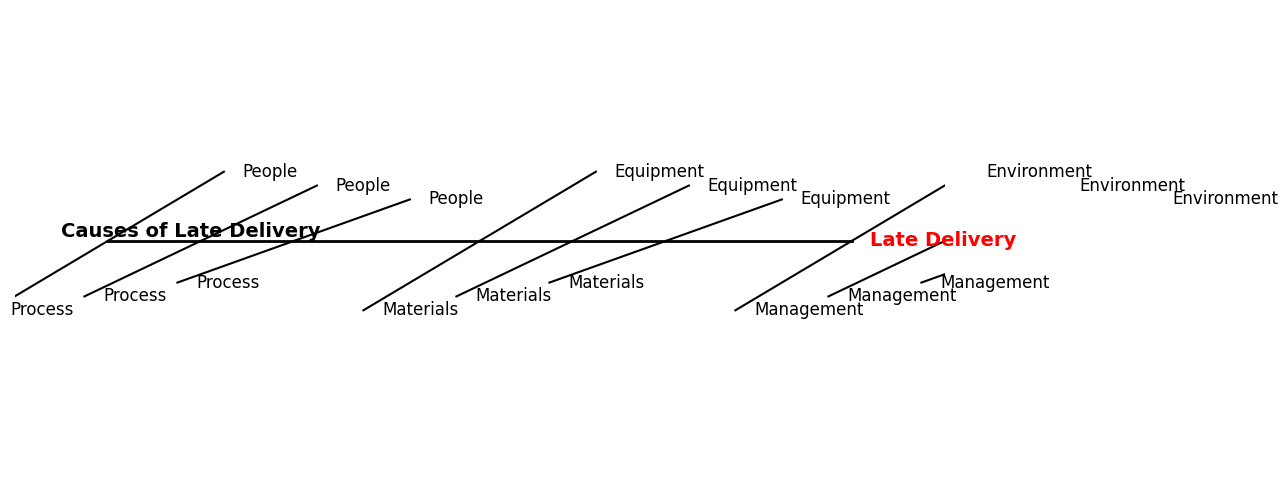

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def draw_fishbone():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(-5, 5)
    
    # Draw main spine
    ax.plot([1, 9], [0, 0], 'k', linewidth=2)
    
    # Categories and their positions
    categories = {
        "People": [(-4, 1.5), (-3, 1.2), (-2, 0.9)],
        "Process": [(-4, -1.5), (-3, -1.2), (-2, -0.9)],
        "Equipment": [(0, 1.5), (1, 1.2), (2, 0.9)],
        "Materials": [(0, -1.5), (1, -1.2), (2, -0.9)],
        "Environment": [(4, 1.5), (5, 1.2), (6, 0.9)],
        "Management": [(4, -1.5), (5, -1.2), (6, -0.9)],
    }
    
    # Draw category lines
    for i, (category, points) in enumerate(categories.items()):
        x_offset = 2.5 if i % 2 == 0 else -2.5  # Alternating sides
        for x, y in points:
            ax.plot([x + 5, x + 5 + x_offset / 2], [0, y], 'k', linewidth=1.5)
            ax.text(x + 5 + x_offset / 2 + 0.2, y, category, fontsize=12, verticalalignment='center')
    
    # Title and effect
    ax.text(9.2, 0, 'Late Delivery', fontsize=14, fontweight='bold', verticalalignment='center', color='red')
    ax.text(0.5, 0.2, 'Causes of Late Delivery', fontsize=14, fontweight='bold', verticalalignment='center')
    
    ax.axis('off')
    plt.show()

draw_fishbone()


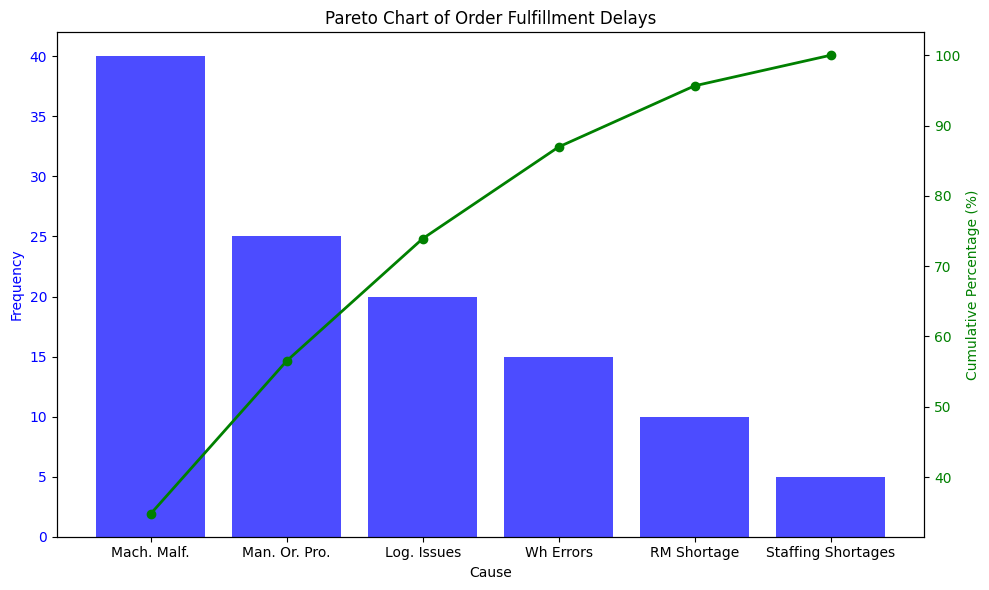

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the Pareto chart
causes = ['Mach. Malf.', 'Man. Or. Pro.', 'Log. Issues', 'Wh Errors', 'RM Shortage', 'Staffing Shortages']
frequencies = [40, 25, 20, 15, 10, 5]

# Sort the data in descending order
sorted_data = sorted(zip(frequencies, causes), reverse=True)
frequencies_sorted, causes_sorted = zip(*sorted_data)

# Calculate cumulative percentages
total = sum(frequencies_sorted)
cumulative_percentage = np.cumsum(frequencies_sorted) / total * 100

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bars for frequency
ax1.bar(causes_sorted, frequencies_sorted, color='blue', alpha=0.7)
ax1.set_xlabel('Cause')
ax1.set_ylabel('Frequency', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second axis for the cumulative percentage
ax2 = ax1.twinx()
ax2.plot(causes_sorted, cumulative_percentage, color='green', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set the title
plt.title('Pareto Chart of Order Fulfillment Delays')

# Show the plot
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
